# 💻 Project: IT Asset Maintenance Forecasting 

#  Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [3]:
df = pd.read_excel("IT_ASSESMENT.xlsx")
df.head()

,AssetID,AssetType,PurchaseDate,LastServiceDate,NextServiceDue,Status,Location
0,A0,Monitor,2021-09-24,2025-04-29,2025-04-30,Working,Hyderabad
1,A1,Printer,2023-09-11,2025-04-29,2025-04-30,Working,Hyderabad
2,A2,Laptop,2022-12-24,2025-04-29,2025-04-30,Working,Bangalore
3,A3,Keyboard,2021-04-27,2025-04-29,2025-04-30,Working,Hyderabad
4,A4,Printer,2023-01-14,2025-04-29,2025-04-30,Under Repair,Bangalore


### Check for Missing Values

In [5]:
df.isnull().sum()

AssetID            0
AssetType          0
PurchaseDate       0
LastServiceDate    0
NextServiceDue     0
Status             0
Location           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   AssetID          10000 non-null  object        
 1   AssetType        10000 non-null  object        
 2   PurchaseDate     10000 non-null  datetime64[ns]
 3   LastServiceDate  10000 non-null  datetime64[ns]
 4   NextServiceDue   10000 non-null  datetime64[ns]
 5   Status           10000 non-null  object        
 6   Location         10000 non-null  object        
dtypes: datetime64[ns](3), object(4)
memory usage: 547.0+ KB


### Convert date columns to datetime format


In [8]:
date_cols = ['PurchaseDate', 'LastServiceDate', 'NextServiceDue']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

### Engineer New Features

Calculate the following new columns:
- **AssetAge** → Current Date - PurchaseDate  
- **DaysSinceLastService** → Current Date - LastServiceDate  
- **DaysUntilDue** → NextServiceDue - Current Date


In [9]:
from datetime import datetime

current_date = datetime.now()
df['AssetAge'] = (current_date - df['PurchaseDate']).dt.days
df['DaysSinceLastService'] = (current_date - df['LastServiceDate']).dt.days
df['DaysUntilDue'] = (df['NextServiceDue'] - current_date).dt.days

### Analyze and Visualize Asset Type Distribution

### 📊 Insights 

- The bar chart shows a **balanced distribution** of asset types — Laptops, Monitors, Printers, Keyboards, and Routers are almost equally represented.  
- This suggests that **IT resources are evenly allocated** across categories, indicating good asset management consistency.  
- No single asset type is overrepresented or underrepresented, meaning maintenance workload is likely **evenly spread**.  

AssetType
Monitor     2015
Laptop      2011
Printer     2008
Router      1988
Keyboard    1978
Name: count, dtype: int64


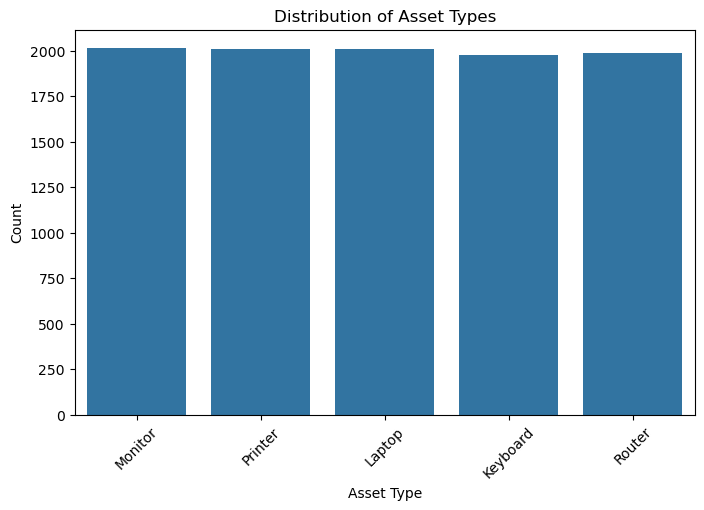

In [10]:
asset_type_counts = df['AssetType'].value_counts()

print(asset_type_counts)

plt.figure(figsize=(8,5))
sns.countplot(x='AssetType', data=df)
plt.title('Distribution of Asset Types')
plt.xlabel('Asset Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Failure Rate by Asset Type

### 📊 Insights

- **Keyboards** have the highest failure rate (≈11.6%), meaning they need maintenance more often.  
- **Monitors** also show a slightly higher failure rate (≈10.7%) compared to other assets.  
- **Laptops, Printers, and Routers** have similar failure rates (around 9–10%), indicating stable performance.  
- Overall, most assets are in **working condition**, showing that maintenance schedules are generally effective.  


Status     Decommissioned  Under Repair  Working  FailureRate (%)
AssetType                                                        
Keyboard              112           230     1636        11.627907
Laptop                101           191     1719         9.497762
Monitor                92           217     1706        10.769231
Printer               103           195     1710         9.711155
Router                 94           195     1699         9.808853


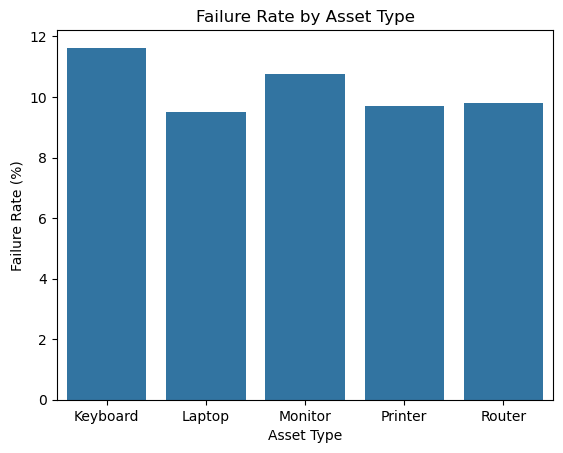

In [11]:
status_counts = df.groupby(['AssetType', 'Status']).size().unstack()

status_counts['FailureRate (%)'] = (status_counts['Under Repair'] / status_counts.sum(axis=1)) * 100

print(status_counts)

sns.barplot(x=status_counts.index, y=status_counts['FailureRate (%)'])
plt.title('Failure Rate by Asset Type')
plt.xlabel('Asset Type')
plt.ylabel('Failure Rate (%)')
plt.show()

### 📘 Descriptive Statistics for Asset Age and Service Cycle

### How old are the assets and how long since their last service?

### 📊 Insights
- The **average asset age** is about **1279 days (~3.5 years)**.  
- The **oldest asset** is around **2017 days (~5.5 years)** old.  
- **DaysSinceLastService** is constant at **191 days**, meaning all assets were serviced at the same time.  
- This consistency suggests a **centralized and timely maintenance schedule** for all IT assets.


In [12]:
stats = df[['AssetAge', 'DaysSinceLastService']].describe()
print(stats)

           AssetAge  DaysSinceLastService
count  10000.000000               10000.0
mean    1280.062000                 192.0
std      421.208825                   0.0
min      558.000000                 192.0
25%      916.000000                 192.0
50%     1278.000000                 192.0
75%     1644.000000                 192.0
max     2018.000000                 192.0


### Which assets are due for maintenance within the next 30 days?

### 📊 Insights
- All **10,000 assets** are marked as **At-Risk**, meaning their maintenance dates are either due or overdue.  
- The negative values in **DaysUntilDue** show that maintenance dates have already passed.  
- This indicates that the **entire asset base requires immediate attention or schedule updates** to bring maintenance tracking up to date.  


In [13]:
at_risk_assets = df[df['DaysUntilDue'] < 30]

print(at_risk_assets.head())

print("Number of At-Risk Assets:", len(at_risk_assets))


  AssetID AssetType PurchaseDate LastServiceDate NextServiceDue        Status  \
0      A0   Monitor   2021-09-24      2025-04-29     2025-04-30       Working   
1      A1   Printer   2023-09-11      2025-04-29     2025-04-30       Working   
2      A2    Laptop   2022-12-24      2025-04-29     2025-04-30       Working   
3      A3  Keyboard   2021-04-27      2025-04-29     2025-04-30       Working   
4      A4   Printer   2023-01-14      2025-04-29     2025-04-30  Under Repair   

    Location  AssetAge  DaysSinceLastService  DaysUntilDue  
0  Hyderabad      1505                   192          -192  
1  Hyderabad       788                   192          -192  
2  Bangalore      1049                   192          -192  
3  Hyderabad      1655                   192          -192  
4  Bangalore      1028                   192          -192  
Number of At-Risk Assets: 10000


### Assets Due for Maintenance by Type and Location

### 📊 Insights
- All asset types show a **similar maintenance load** across locations.  
- **Bangalore** has slightly higher counts of at-risk assets in most categories.  
- **Hyderabad** and **Pune** maintain balanced numbers, suggesting consistent maintenance scheduling.  
- The even distribution indicates that **maintenance needs are spread uniformly** across all locations and asset types.  


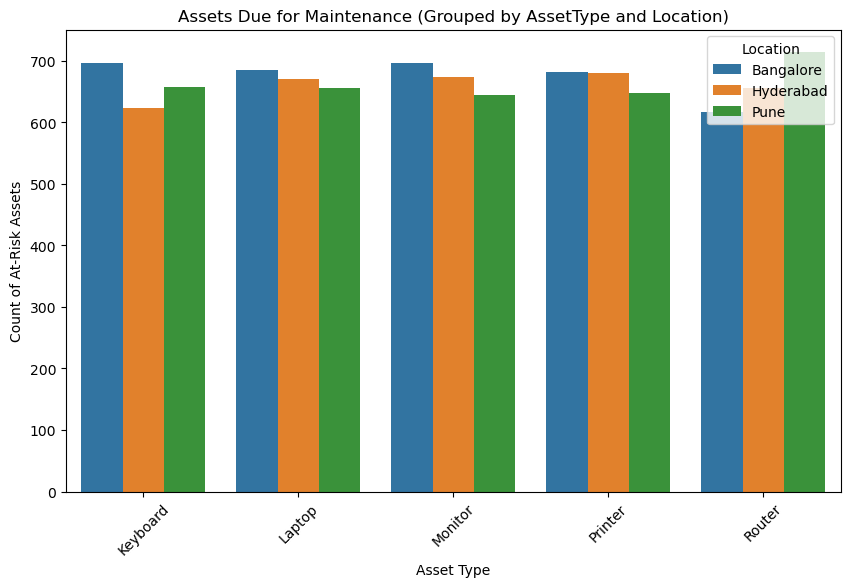

In [14]:
at_risk_count = df[df['DaysUntilDue'] < 30].groupby(['AssetType', 'Location']).size().reset_index(name='Count')

plt.figure(figsize=(10,6))
sns.barplot(x='AssetType', y='Count', hue='Location', data=at_risk_count)
plt.title('Assets Due for Maintenance (Grouped by AssetType and Location)')
plt.xlabel('Asset Type')
plt.ylabel('Count of At-Risk Assets')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.show()

In [ ]:
df.to_excel('IT Asset Maintenance Forecasting(for sql).xlsx', index=False)